# Integrated_DB_Analysis
This .ipynb shows multiple sets of analysis on the integrated database of movies.

In [43]:
import sys
import string
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats


In [2]:
df = pd.read_csv('../DATA/integrated_table.csv')

In [3]:
df.head(3)

,id,title,year,mpaa,runtime,genres,director,stars,gross
0,1757,Hamlet,1996,PG-13,242 min,drama,Kenneth Branagh,"kate winslet,kenneth branagh,julie christie,de...",$441000000.0
1,3547,Home for the Holidays,1995,PG-13,104 min,"comedy, drama, romance",jodie foster,"charles durning,holly hunter,robert downey jr....",$1752000000.0
2,502,Hot Fuzz,2007,R,121 min,"action, comedy,comedy",edgar wright,"bill nighy,simon pegg,nick frost,martin freeman",$2364000000.0


## OLAP Style Analysis

Average movie gross per genre kind.

In [5]:
# Generate all of the unique movie genres.
genres = df['genres']
genresList = genres.map(lambda item: item.split(','))
genreSet = set()
for genres in genresList.tolist():
    genreSet.update([sl_case.lower().strip() for sl_case in genres])
genreSet

{'action',
 'adventure',
 'animation',
 'biography',
 'black comedy',
 'comedy',
 'concert/performance',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'multiple genres',
 'music',
 'musical',
 'mystery',
 'romance',
 'romantic comedy',
 'sci-fi',
 'short',
 'sport',
 'thriller',
 'thriller/suspense',
 'war',
 'western'}

[Text(0,0,'action'),
 Text(0,0,'adventure'),
 Text(0,0,'animation'),
 Text(0,0,'biography'),
 Text(0,0,'black comedy'),
 Text(0,0,'comedy'),
 Text(0,0,'concert/performance'),
 Text(0,0,'crime'),
 Text(0,0,'documentary'),
 Text(0,0,'drama'),
 Text(0,0,'family'),
 Text(0,0,'fantasy'),
 Text(0,0,'film-noir'),
 Text(0,0,'history'),
 Text(0,0,'horror'),
 Text(0,0,'multiple genres'),
 Text(0,0,'music'),
 Text(0,0,'musical'),
 Text(0,0,'mystery'),
 Text(0,0,'romance'),
 Text(0,0,'romantic comedy'),
 Text(0,0,'sci-fi'),
 Text(0,0,'short'),
 Text(0,0,'sport'),
 Text(0,0,'thriller'),
 Text(0,0,'thriller/suspense'),
 Text(0,0,'war'),
 Text(0,0,'western')]

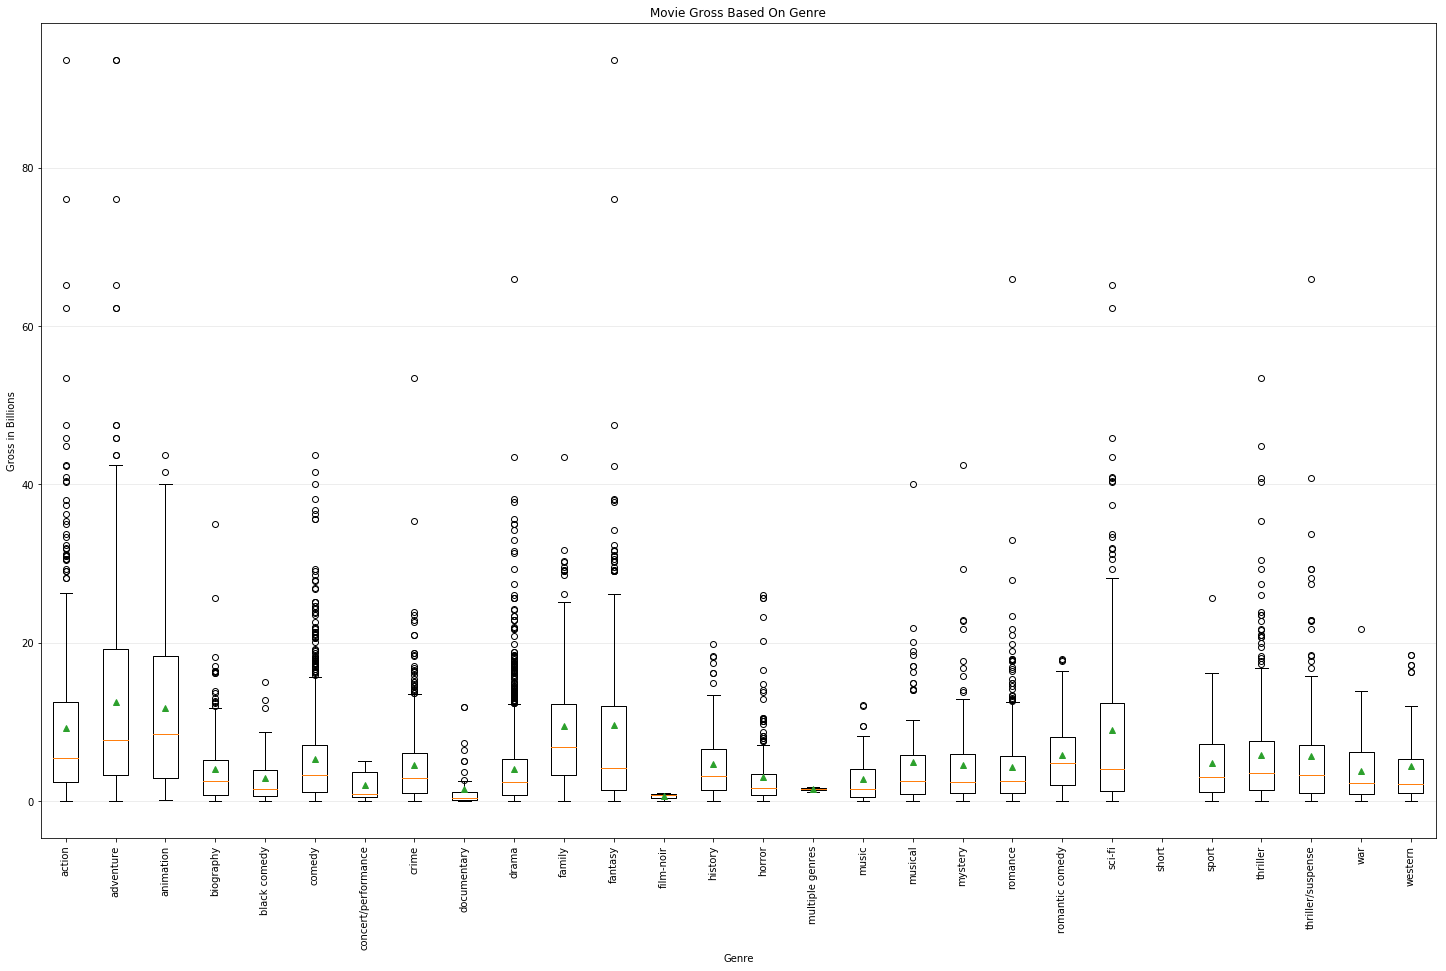

In [29]:
# Set figure size
fig_size = [0,0]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

# Split the lists of movies by genre.
genreGrossDict = {genre: [] for genre in genreSet}
for i, row in df.iterrows():
    #import pdb; pdb.set_trace()
    if float(row['gross'][1:]) <= 100000:
        continue
    else:
        movieGenres = list(map(lambda item: item.lower().strip() , row['genres'].split(',')))
        for genre in movieGenres:
            genreGrossDict[genre].append(float(row['gross'][1:])/1000000000)
            
# Create figure and get plot axis.
f, axarr = plt.subplots(1, 1)
ax1 = axarr
data = []
for genre in sorted(genreGrossDict.keys()):
    data.append(genreGrossDict[genre])

bp = ax1.boxplot(data, showmeans=True)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Gross in Billions')
ax1.set_title('Movie Gross Based On Genre')
ax1.set_xticklabels(sorted(genreGrossDict.keys()),rotation=90, fontsize=10)

Average movie time per genre kind.

[Text(0,0,'action'),
 Text(0,0,'adventure'),
 Text(0,0,'animation'),
 Text(0,0,'biography'),
 Text(0,0,'black comedy'),
 Text(0,0,'comedy'),
 Text(0,0,'concert/performance'),
 Text(0,0,'crime'),
 Text(0,0,'documentary'),
 Text(0,0,'drama'),
 Text(0,0,'family'),
 Text(0,0,'fantasy'),
 Text(0,0,'film-noir'),
 Text(0,0,'history'),
 Text(0,0,'horror'),
 Text(0,0,'multiple genres'),
 Text(0,0,'music'),
 Text(0,0,'musical'),
 Text(0,0,'mystery'),
 Text(0,0,'romance'),
 Text(0,0,'romantic comedy'),
 Text(0,0,'sci-fi'),
 Text(0,0,'short'),
 Text(0,0,'sport'),
 Text(0,0,'thriller'),
 Text(0,0,'thriller/suspense'),
 Text(0,0,'war'),
 Text(0,0,'western')]

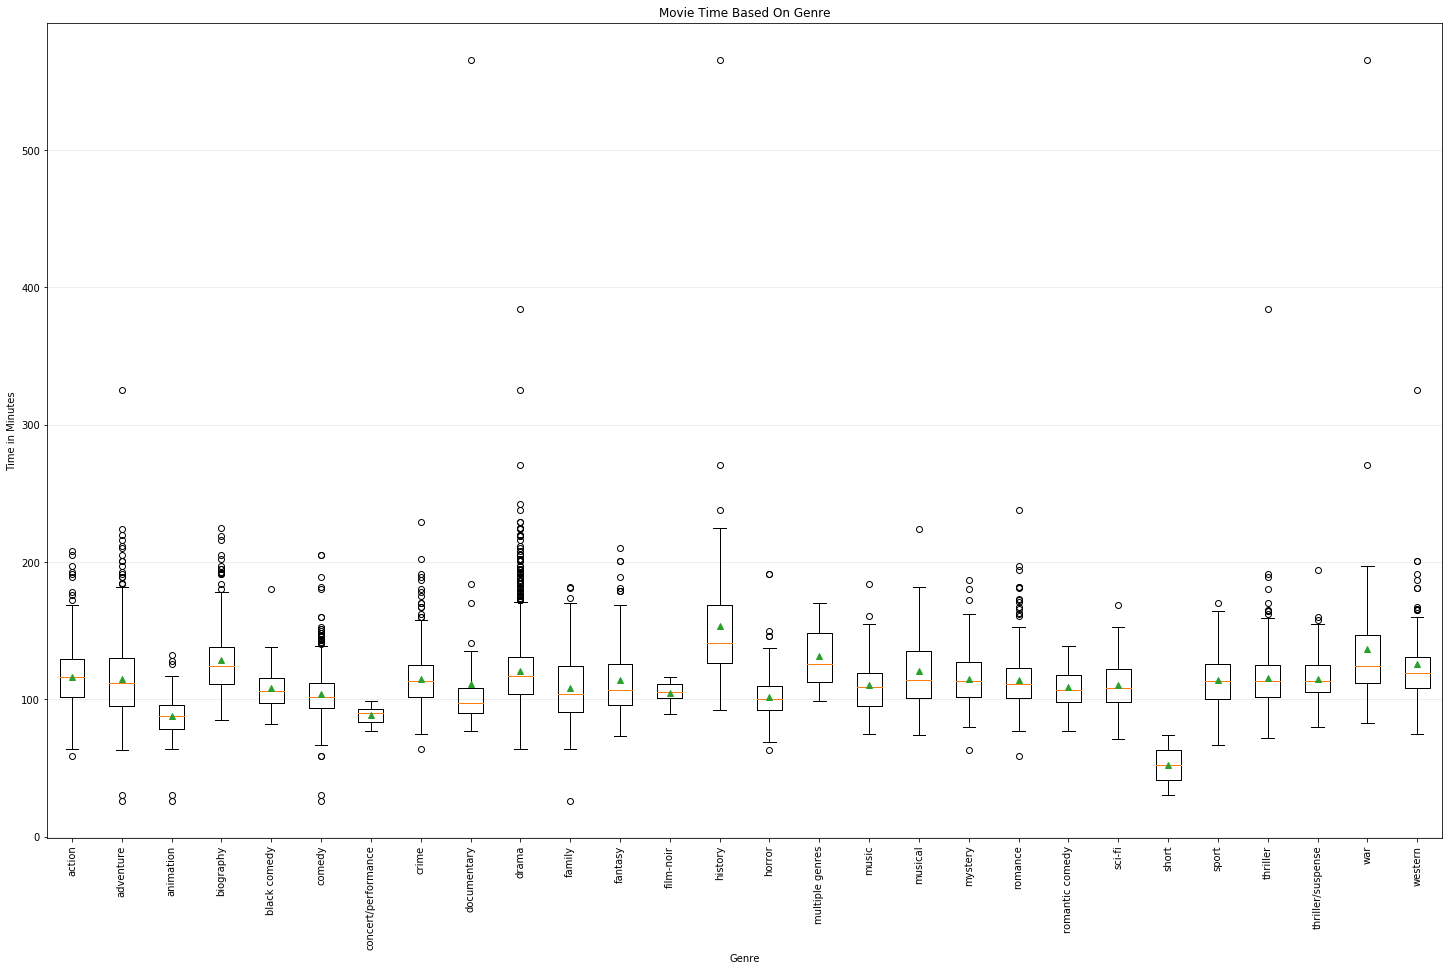

In [32]:
# Set figure size
fig_size = [0,0]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

# Split the lists of movies by genre.
genreGrossDict = {genre: [] for genre in genreSet}
for i, row in df.iterrows():
    #import pdb; pdb.set_trace()
    if float(row['runtime'].split()[0]) <= 0:
        continue
    else:
        movieGenres = list(map(lambda item: item.lower().strip() , row['genres'].split(',')))
        for genre in movieGenres:
            genreGrossDict[genre].append(float(row['runtime'].split()[0]))
            
# Create figure and get plot axis.
f, axarr = plt.subplots(1, 1)
ax1 = axarr
data = []
for genre in sorted(genreGrossDict.keys()):
    data.append(genreGrossDict[genre])

bp = ax1.boxplot(data, showmeans=True)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Time in Minutes')
ax1.set_title('Movie Time Based On Genre')
ax1.set_xticklabels(sorted(genreGrossDict.keys()),rotation=90, fontsize=10)

Average, max, min, and std. dev. movie gross per mpaa rating.

[Text(0,0,'-1'),
 Text(0,0,'approved'),
 Text(0,0,'g'),
 Text(0,0,'gp'),
 Text(0,0,'m'),
 Text(0,0,'m/pg'),
 Text(0,0,'nc-17'),
 Text(0,0,'not rated'),
 Text(0,0,'passed'),
 Text(0,0,'pg'),
 Text(0,0,'pg-13'),
 Text(0,0,'r'),
 Text(0,0,'tv-14'),
 Text(0,0,'tv-g'),
 Text(0,0,'tv-ma'),
 Text(0,0,'unrated'),
 Text(0,0,'x')]

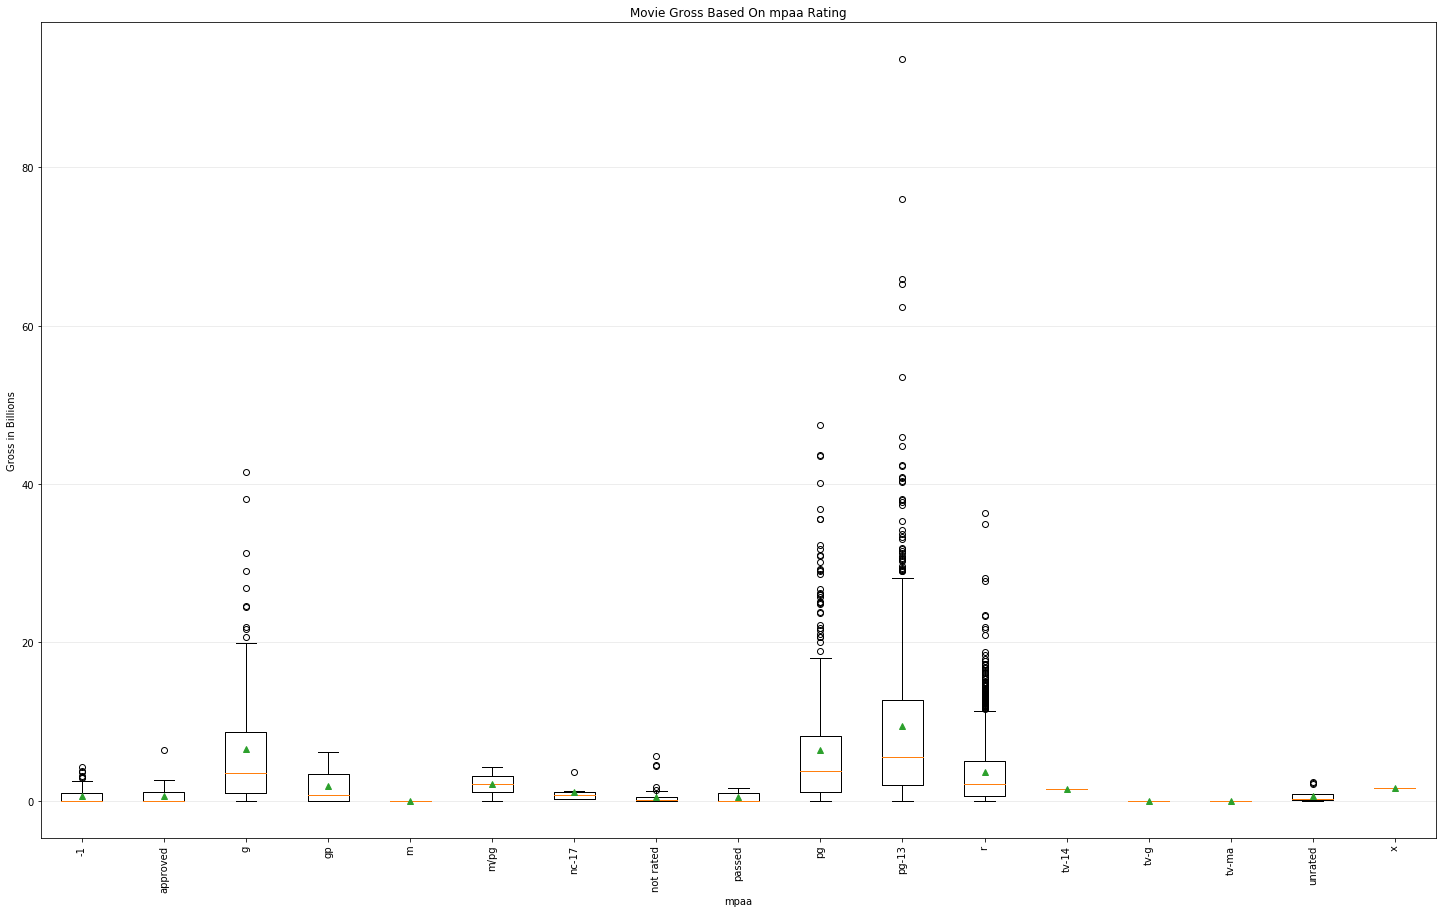

In [41]:
# Set figure size
fig_size = [0,0]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

# Split the lists of movies by genre.
# Generate all of the unique movie genres.
mpaas = df['mpaa']
mpaaList = mpaas.map(lambda item: item.split(','))
mpaaSet = set()
for mpaa in mpaaList.tolist():
    mpaaSet.update([sl_case.lower().strip() for sl_case in mpaa])
mpaaGrossDict = {mpaa: [] for mpaa in mpaaSet}

for i, row in df.iterrows():
    #import pdb; pdb.set_trace()
    movieMpaas = list(map(lambda item: item.lower().strip() , row['mpaa'].split(',')))
    for mpaa in movieMpaas:
        mpaaGrossDict[mpaa].append(float(row['gross'][1:])/1000000000)
            
# Create figure and get plot axis.
f, axarr = plt.subplots(1, 1)
ax1 = axarr
data = []
for mpaa in sorted(mpaaGrossDict.keys()):
    data.append(mpaaGrossDict[mpaa])

bp = ax1.boxplot(data, showmeans=True)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)
ax1.set_xlabel('mpaa')
ax1.set_ylabel('Gross in Billions')
ax1.set_title('Movie Gross Based On mpaa Rating')
ax1.set_xticklabels(sorted(mpaaGrossDict.keys()),rotation=90, fontsize=10)

Average, max, min, and std. dev. movie time per mpaa rating.

[Text(0,0,'-1'),
 Text(0,0,'approved'),
 Text(0,0,'g'),
 Text(0,0,'gp'),
 Text(0,0,'m'),
 Text(0,0,'m/pg'),
 Text(0,0,'nc-17'),
 Text(0,0,'not rated'),
 Text(0,0,'passed'),
 Text(0,0,'pg'),
 Text(0,0,'pg-13'),
 Text(0,0,'r'),
 Text(0,0,'tv-14'),
 Text(0,0,'tv-g'),
 Text(0,0,'tv-ma'),
 Text(0,0,'unrated'),
 Text(0,0,'x')]

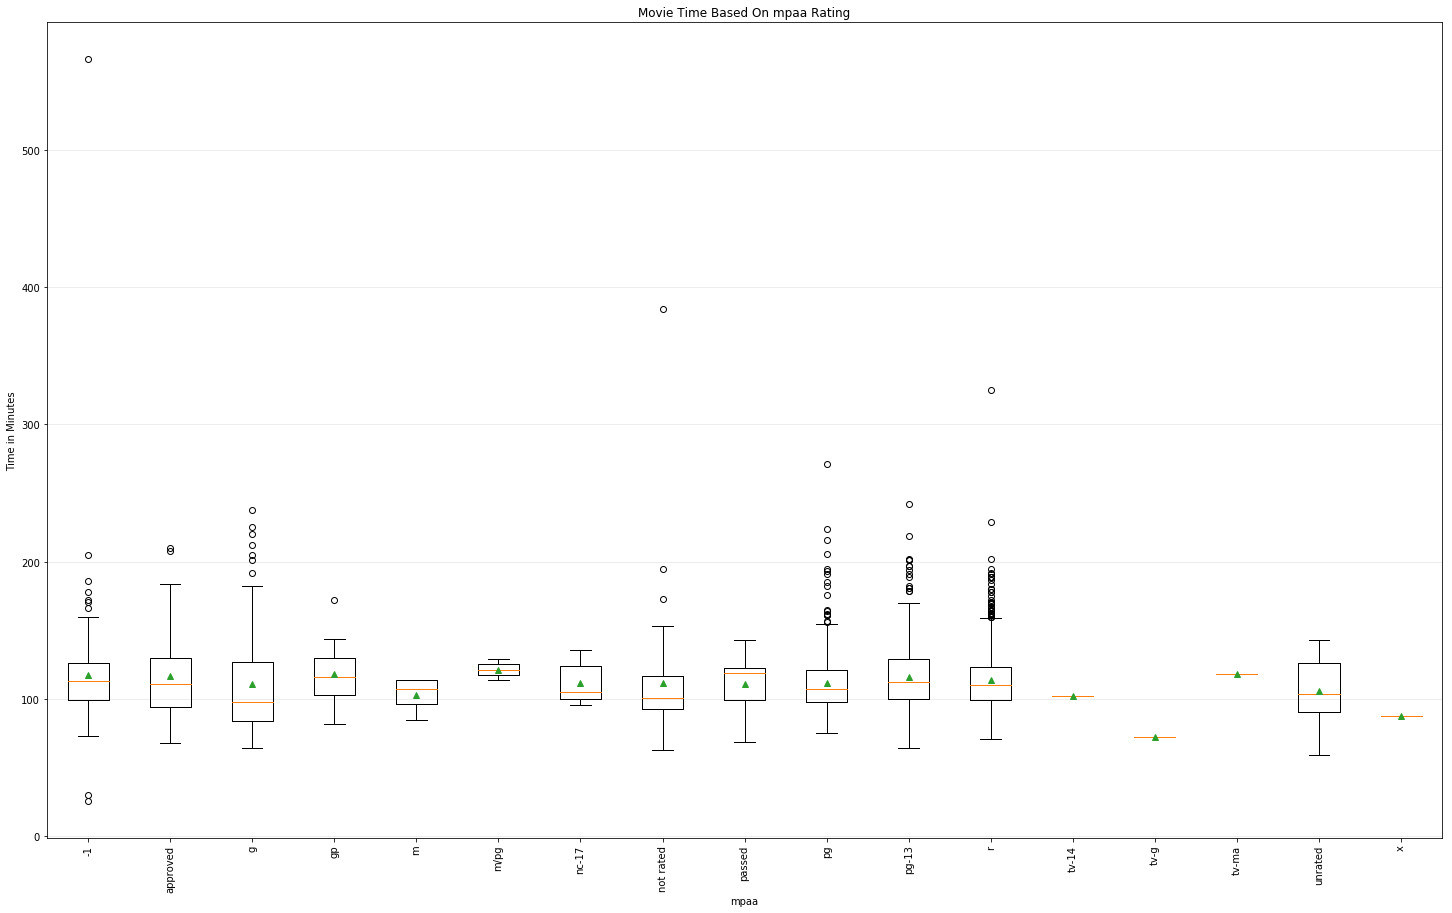

In [42]:
# Set figure size
fig_size = [0,0]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

# Split the lists of movies by genre.
# Generate all of the unique movie genres.
mpaas = df['mpaa']
mpaaList = mpaas.map(lambda item: item.split(','))
mpaaSet = set()
for mpaa in mpaaList.tolist():
    mpaaSet.update([sl_case.lower().strip() for sl_case in mpaa])
mpaaGrossDict = {mpaa: [] for mpaa in mpaaSet}

for i, row in df.iterrows():
    #import pdb; pdb.set_trace()
    movieMpaas = list(map(lambda item: item.lower().strip() , row['mpaa'].split(',')))
    for mpaa in movieMpaas:
        mpaaGrossDict[mpaa].append(float(row['runtime'].split()[0]))
            
# Create figure and get plot axis.
f, axarr = plt.subplots(1, 1)
ax1 = axarr
data = []
for mpaa in sorted(mpaaGrossDict.keys()):
    data.append(mpaaGrossDict[mpaa])

bp = ax1.boxplot(data, showmeans=True)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)
ax1.set_xlabel('mpaa')
ax1.set_ylabel('Time in Minutes')
ax1.set_title('Movie Time Based On mpaa Rating')
ax1.set_xticklabels(sorted(mpaaGrossDict.keys()),rotation=90, fontsize=10)

## Other Kinds of Analysis

Is movie time correlated to movie gross? (Use Spearman Rank Correlation which doesn't assume the data is normally distributed). The result below shows that there is some correlation between runtime and movie gross, and that the statistical significance of the data *not* being correlated is low. The results also show that there is an even higher correlation between movie year and movie gross.

In [60]:
#for i, row in df.iterrows():
    #import pdb; pdb.set_trace()
runtimes = df['runtime'].map(lambda item: float(item.lower().split()[0]))
gross = df['gross'].map(lambda item: float(item.lower()[1:])/1000000000)
years = df['year'].map(lambda item: float(item))
print("Runtime correlation to Movie Gross:")
print(stats.spearmanr(runtimes, gross))
print("Year correlation to Movie Gross:")
print(stats.spearmanr(years, gross))

Runtime correlation to Movie Gross:
SpearmanrResult(correlation=0.25852659016321544, pvalue=4.341047669255873e-42)
Year correlation to Movie Gross:
SpearmanrResult(correlation=0.3388931633734646, pvalue=7.458510545431806e-73)
